In [1]:
import pandas as pd
import xgboost
import shap
import pickle

In [22]:
def xlsx_to_dict(filename: str) -> dict:
    df = pd.read_table(filename)
    return dict(zip(df.Tagname.str.lower(), df.opis))

tag_dict = {
    "min": "minimum",
    "absolute_sum_of_changes": "wartość bezwględna zmian",
    "max": "maksimum",
    "mean": "średnia",
    "skew": "skośność"
}

def parse_columns(df: pd.DataFrame) -> pd.DataFrame:
    new_cols = {}
    tags = []
    for col in df.columns:
        new_cols[col] = col.split("_", 1)[0]
        tags.append(col.split("_", 1)[1])
        
    tags = [tag_dict[tag] for tag in tags]
    df = df.rename(columns=new_cols)
    tagnames = xlsx_to_dict('../resources/nametags.txt')
    df = df.rename(columns=tagnames)
    df.columns = [col + " " + tags[i] for i, col in enumerate(df.columns)]
    return df

In [23]:
df = pd.read_csv("../dataset_30_small.csv")
y = df["temp"]
X = df.drop(["czas", "temp"], axis=1)
X = parse_columns(X)
X

,TEMP.14 POD 2 WARSTWĄ WYMURÓWKI minimum,REG PYL ZWROT LIW4 minimum,REG PYL ZWROT LIW4 wartość bezwględna zmian,WENT. RF02 ODCZ_ZAD OBROTÓW minimum,TEMP.17 POD 2 WARSTWĄ WYMURÓWKI minimum,WODA POWROTNA KOLEKTORA KZ12 minimum,WODA POWROTNA KOLEKTORA KZ12 maksimum,WODA CHŁODZĄCA DO KOLEKTOR KZ7 maksimum,WODA CHŁODZĄCA DO KOLEKTOR KZ7 średnia,TEMP. NA KOL.. KAN.1-34 minimum,TEMP.1 POD 2 WARSTWĄ WYMURÓWKI minimum,TEMP22 POD 2 WARSTWĄ WYMURÓWKI minimum,SUMARYCZNA MOC CIEPLNA ODEBRANA - CAŁKOWITA minimum,SUMARYCZNA MOC CIEPLNA ODEBRANA - CAŁKOWITA maksimum,SUMARYCZNA MOC CIEPLNA ODEBRANA - CAŁKOWITA wartość bezwględna zmian,REG NADAWY KONCENTRATU LIW1 skośność,REG NADAWY KONCENTRATU LIW1 wartość bezwględna zmian,WODA CHŁODZĄCA DO KOLEKTOR KZ15 minimum,WODA POWROTNA KOLEKTORA KZ13 minimum,WODA CHŁODZĄCA DO KOLEKTOR KZ13 minimum
0,449.890089,19.854799,4.720509,92.045435,427.607628,31.165436,31.595133,109.861116,108.496568,18.612499,385.313782,466.102266,15.074689,15.199544,0.325263,0.473234,14.764852,108.761308,30.874105,142.985941
1,449.864485,19.895281,3.925764,92.068457,427.556460,31.391146,31.474224,110.046307,109.715521,18.075895,385.152091,466.051088,14.610781,14.836278,0.347226,0.600669,15.820964,108.938079,31.223456,143.162819
2,449.804996,18.327651,9.594162,92.074051,427.505282,31.565242,31.638242,109.937796,109.435776,17.680137,385.100898,465.999910,14.240034,14.509810,0.365595,0.629190,13.578498,108.801151,31.377056,143.046576
3,449.753833,20.879188,4.570232,92.072773,427.484597,31.452425,31.609812,109.915863,109.200794,17.494467,385.070390,465.974322,13.879839,14.225614,0.428852,0.848864,17.690807,108.721026,31.227293,142.978945
4,449.702670,22.658180,3.476629,92.071197,427.471803,31.320126,31.616741,110.105791,109.723850,17.473172,385.031984,465.948733,13.715085,13.885071,0.334901,0.791855,16.012973,108.796355,31.070268,143.018654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,455.368219,30.964217,9.275709,98.125112,411.819196,30.765001,31.059998,102.637480,102.435786,9.675762,376.864078,465.785777,14.707773,15.888954,1.319954,0.687504,14.755280,97.785962,28.319121,138.487628
11379,455.185923,30.082811,8.223297,98.087563,411.713628,30.543753,31.071934,102.894684,102.503158,9.548869,376.776638,465.662067,15.967954,18.655348,2.687394,0.425850,13.151903,97.736368,28.324564,138.490869
11380,455.057994,27.177329,7.758613,98.125081,411.662481,30.029215,30.468298,102.593705,102.013917,9.286221,376.725460,465.610858,15.494876,16.527723,1.426691,0.745125,18.561618,97.713980,28.457689,138.430676
11381,454.930055,27.140972,6.988503,98.080254,411.626677,30.777789,31.202382,101.708210,101.529788,9.092198,376.689209,465.544726,16.267929,17.733470,2.871934,0.772133,18.900025,97.756562,28.455235,138.453558


In [24]:
model = pickle.load(open("../static/model.pkl", 'rb'))
explainer = shap.Explainer(model)
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [25]:
shap_values

.values =
array([[-0.12362036, -1.0394472 ,  0.16710311, ...,  0.73273027,
        -0.14399731, -0.4793113 ],
       [-0.0646354 , -1.028995  , -1.0598586 , ...,  0.5963412 ,
        -0.29103288, -0.20686337],
       [-0.35879135,  0.05070164,  0.37786192, ...,  0.76157856,
         1.1476983 , -0.1509753 ],
       ...,
       [ 0.08276886,  0.29778317,  0.84766376, ..., -2.3537512 ,
        -0.5610177 ,  0.8786096 ],
       [ 0.2597538 ,  0.4396276 ,  0.43107152, ..., -1.8155113 ,
         0.91049725,  1.1526583 ],
       [ 0.25179708,  0.6131541 ,  0.6161329 , ..., -3.1135776 ,
         0.3224214 ,  1.4633043 ]], dtype=float32)

.base_values =
array([1303.3889, 1303.3889, 1303.3889, ..., 1303.3889, 1303.3889,
       1303.3889], dtype=float32)

.data =
array([[449.89008942,  19.85479933,   4.72050889, ..., 108.76130753,
         30.87410523, 142.98594106],
       [449.86448517,  19.895281  ,   3.92576418, ..., 108.93807945,
         31.22345603, 143.16281865],
       [449.80499573,  1

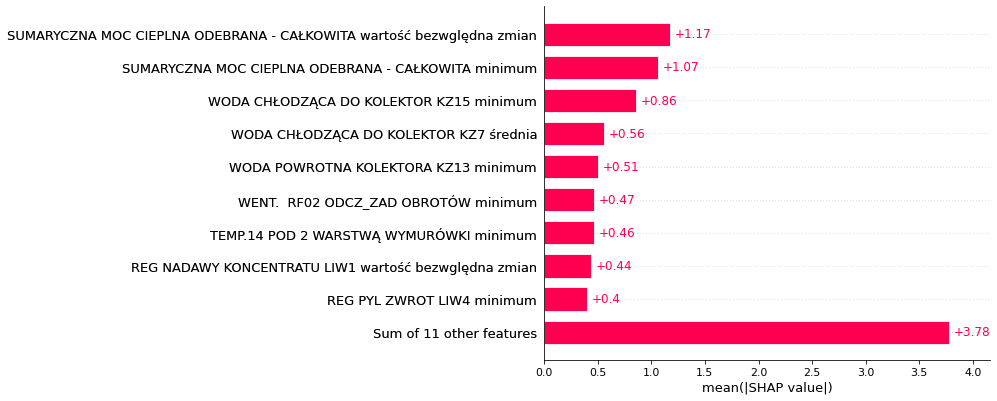

In [26]:
shap.plots.bar(shap_values)